<a href="https://colab.research.google.com/github/anirudhawagh/Unemployment_Analysis_Oasis_infobyte/blob/main/Unemployment_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **UNEMPLOYMENT ANALYSIS WITH PYTHON**

 **Problem Statement**  Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as pl
import matplotlib.pyplot as plt

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

# Load Dataset
database ='/content/drive/MyDrive/Unemployment in India.csv'
df =pd.read_csv(database)

In [5]:

# Dataset First Look
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Get the names of all the columns
column_names = df.columns.tolist()

# Print the names of all the columns in vertical format
print("Column names:")
for column_name in column_names:
    print(column_name)

# Get the total number of columns
num_columns = df.shape[1]

# Print the total number of columns
print("Total number of columns:", num_columns)


Column names:
Region
 Date
 Frequency
 Estimated Unemployment Rate (%)
 Estimated Employed
 Estimated Labour Participation Rate (%)
Area
Total number of columns: 7


In [7]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
# Checking for null values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [9]:
# Removing the null values in the dataset
df = df.dropna()
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [10]:
# Dataset Duplicate Value Count
# Count the duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()

# Print the count of duplicate rows
print("Number of duplicate rows in the dataset:", duplicate_count)

Number of duplicate rows in the dataset: 0


In [11]:
# Dataset Describe
df.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [12]:
# Convert 'Date' column to datetime
df[' Date'] = pd.to_datetime(df[' Date'])

# Extract month and year
df['Month'] = df[' Date'].dt.month
df['Year'] = df[' Date'].dt.year

<ipython-input-12-afc125aafd6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Date'] = pd.to_datetime(df[' Date'])
<ipython-input-12-afc125aafd6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df[' Date'].dt.month
<ipython-input-12-afc125aafd6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [13]:
# Rename the 'Region' column to 'State'
df.rename(columns={'Region': 'State'}, inplace=True)

<ipython-input-13-8f0bad5d59e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Region': 'State'}, inplace=True)


In [14]:
state_to_region = {
    'Andhra Pradesh': 'Southern Region',
    'Arunachal Pradesh': 'Northeastern Region',
    'Assam': 'Northeastern Region',
    'Bihar': 'Eastern Region',
    'Chhattisgarh': 'Central Region',
    'Goa': 'Western Region',
    'Gujarat': 'Western Region',
    'Haryana': 'Northern Region',
    'Himachal Pradesh': 'Northern Region',
    'Jharkhand': 'Eastern Region',
    'Karnataka': 'Southern Region',
    'Kerala': 'Southern Region',
    'Madhya Pradesh': 'Central Region',
    'Maharashtra': 'Western Region',
    'Manipur': 'Northeastern Region',
    'Meghalaya': 'Northeastern Region',
    'Mizoram': 'Northeastern Region',
    'Nagaland': 'Northeastern Region',
    'Odisha': 'Eastern Region',
    'Punjab': 'Northern Region',
    'Rajasthan': 'Northern Region',
    'Sikkim': 'Northeastern Region',
    'Tamil Nadu': 'Southern Region',
    'Telangana': 'Southern Region',
    'Tripura': 'Northeastern Region',
    'Uttar Pradesh': 'Northern Region',
    'Uttarakhand': 'Northern Region',
    'West Bengal': 'Eastern Region',
    'Andaman and Nicobar Islands': 'Islands',
    'Chandigarh': 'Union Territory',
    'Dadra and Nagar Haveli and Daman and Diu': 'Union Territory',
    'Lakshadweep': 'Islands',
    'Delhi': 'National Capital Territory',
    'Puducherry': 'Union Territory'
}


In [15]:
df['Region'] = df['State'].map(state_to_region)


<ipython-input-15-a637a3ca58e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['State'].map(state_to_region)


In [16]:
# Remove rows with missing 'Region' values
df = df.dropna(subset=['Region'])

In [17]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 753
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   State                                     719 non-null    object        
 1    Date                                     719 non-null    datetime64[ns]
 2    Frequency                                719 non-null    object        
 3    Estimated Unemployment Rate (%)          719 non-null    float64       
 4    Estimated Employed                       719 non-null    float64       
 5    Estimated Labour Participation Rate (%)  719 non-null    float64       
 6   Area                                      719 non-null    object        
 7   Month                                     719 non-null    int64         
 8   Year                                      719 non-null    int64         
 9   Region                          

In [18]:
df


,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year,Region
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,2019,Southern Region
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,2019,Southern Region
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,2019,Southern Region
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,2019,Southern Region
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,2019,Southern Region
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2,2020,Eastern Region
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3,2020,Eastern Region
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4,2020,Eastern Region
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5,2020,Eastern Region


**Visualization 1: Line Plot - Unemployment Rate Trends Over Time**

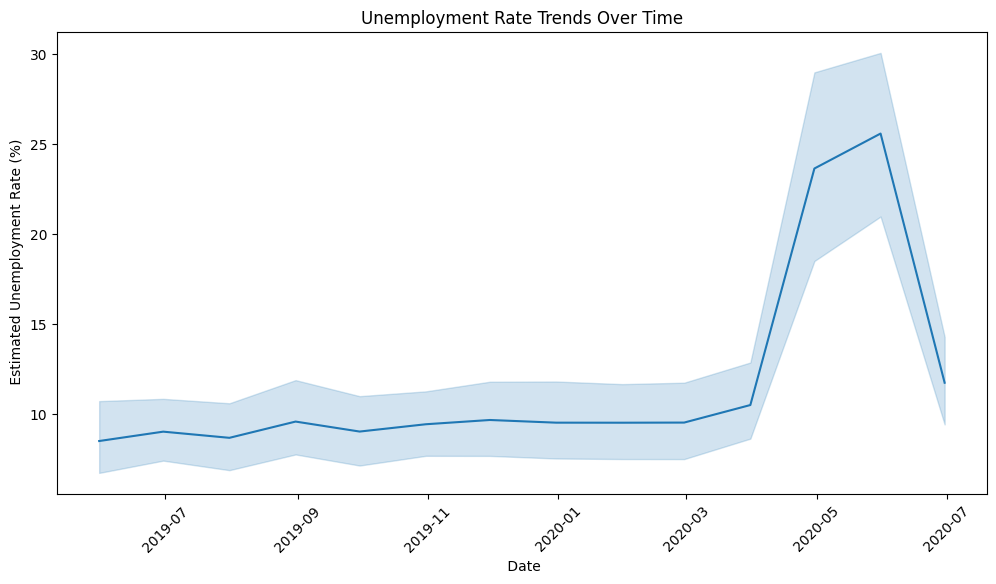

In [19]:
# Visualization 1: Unemployment Rate Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=45)
plt.title('Unemployment Rate Trends Over Time')
plt.show()

**Visualization 2: Bar Plot - Average Unemployment Rate by Region**

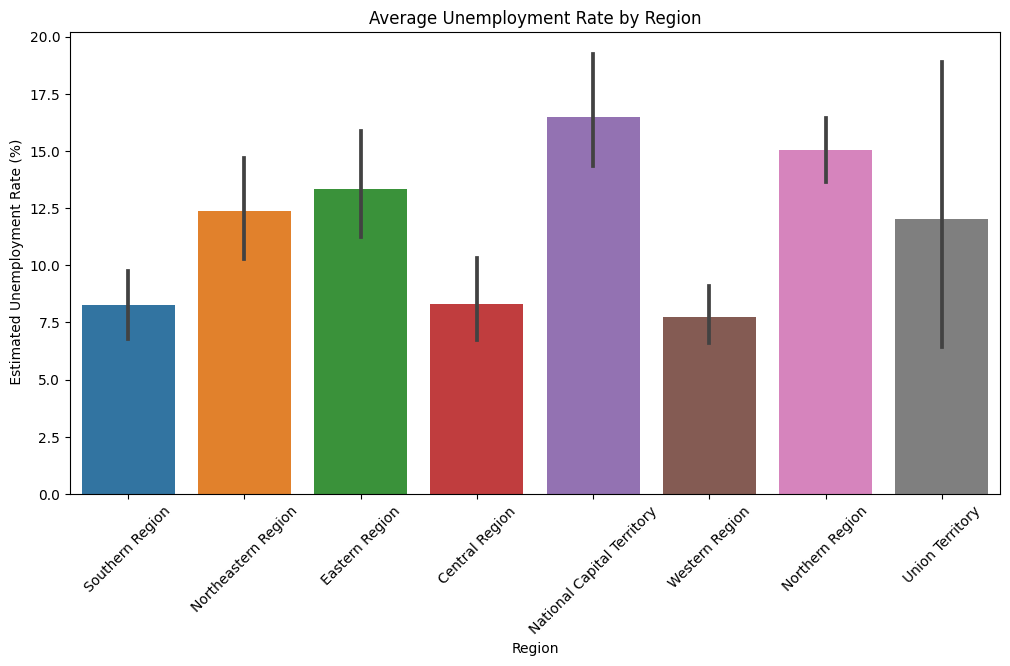

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=45)
plt.title('Average Unemployment Rate by Region')
plt.show()


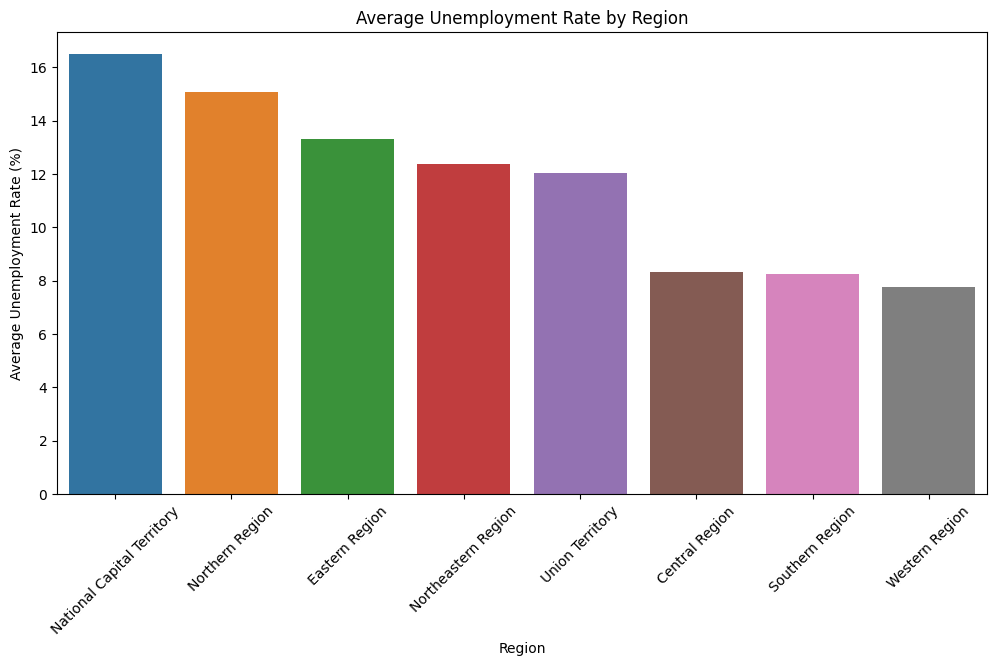

The region with the highest unemployment rate is National Capital Territory


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by region and calculate the average unemployment rate for each region
region_avg_unemployment = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Sort the data by average unemployment rate in descending order to find the highest
region_avg_unemployment = region_avg_unemployment.sort_values(by=' Estimated Unemployment Rate (%)', ascending=False)

# Get the region with the highest unemployment rate
highest_unemployment_region = region_avg_unemployment.iloc[0]['Region']

# Create a bar plot to visualize the average unemployment rate by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=region_avg_unemployment)
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

print(f"The region with the highest unemployment rate is {highest_unemployment_region}")


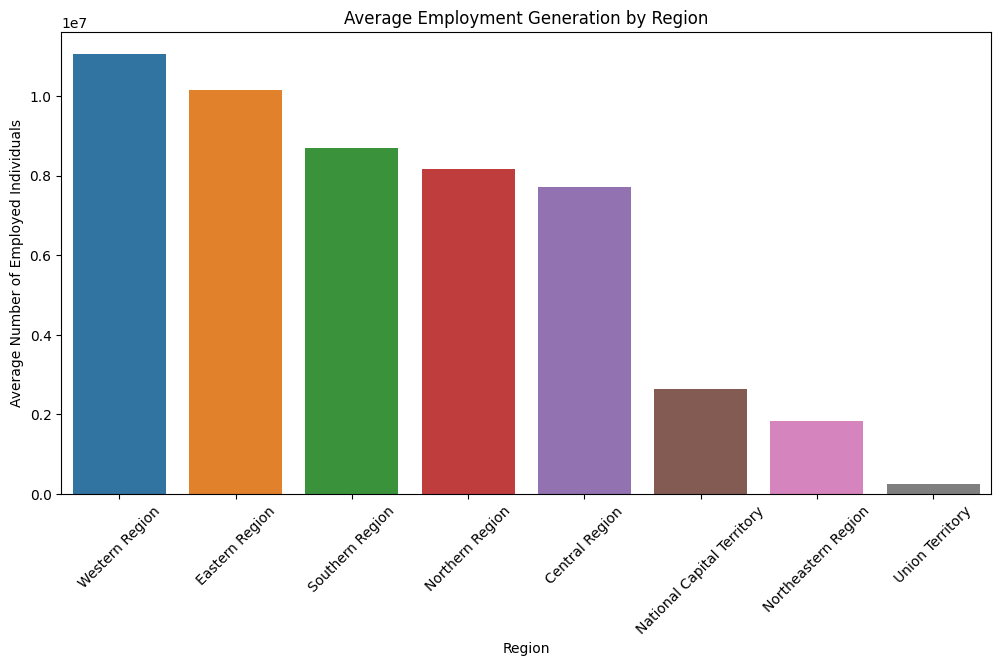

The region with the highest employment generation is Western Region


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by region and calculate the average number of employed individuals for each region
region_avg_employment = df.groupby('Region')[' Estimated Employed'].mean().reset_index()

# Sort the data by average number of employed individuals in descending order to find the highest
region_avg_employment = region_avg_employment.sort_values(by=' Estimated Employed', ascending=False)

# Get the region with the highest employment generation
highest_employment_region = region_avg_employment.iloc[0]['Region']

# Create a bar plot to visualize the average number of employed individuals by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y=' Estimated Employed', data=region_avg_employment)
plt.title('Average Employment Generation by Region')
plt.xlabel('Region')
plt.ylabel('Average Number of Employed Individuals')
plt.xticks(rotation=45)
plt.show()

print(f"The region with the highest employment generation is {highest_employment_region}")


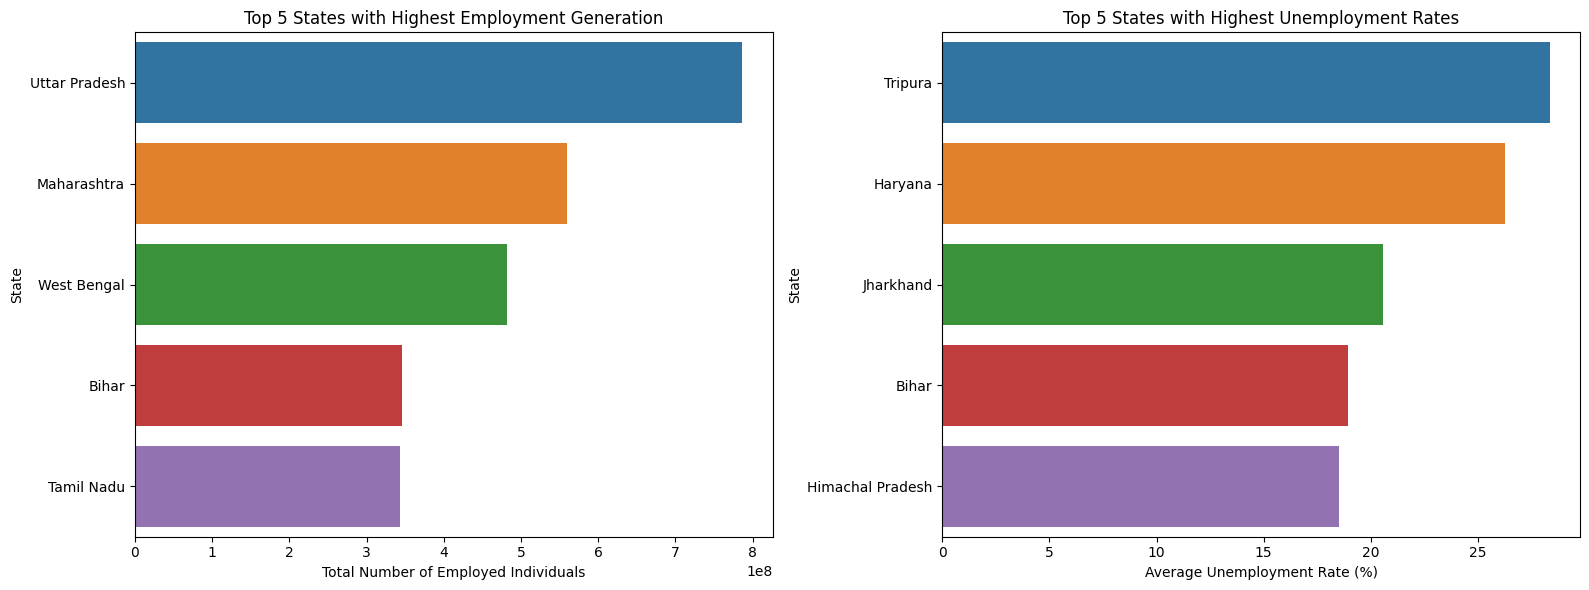

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with two columns
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Top 5 States with Highest Employment Generation
state_total_employment = df.groupby('State')[' Estimated Employed'].sum().reset_index()
top_5_employment_states = state_total_employment.sort_values(by=' Estimated Employed', ascending=False).head(5)

sns.barplot(x=' Estimated Employed', y='State', data=top_5_employment_states, ax=axs[0])
axs[0].set_title('Top 5 States with Highest Employment Generation')
axs[0].set_xlabel('Total Number of Employed Individuals')
axs[0].set_ylabel('State')

# Top 5 States with Highest Unemployment Rates
state_avg_unemployment = df.groupby('State')[' Estimated Unemployment Rate (%)'].mean().reset_index()
top_5_unemployment_states = state_avg_unemployment.sort_values(by=' Estimated Unemployment Rate (%)', ascending=False).head(5)

sns.barplot(x=' Estimated Unemployment Rate (%)', y='State', data=top_5_unemployment_states, ax=axs[1])
axs[1].set_title('Top 5 States with Highest Unemployment Rates')
axs[1].set_xlabel('Average Unemployment Rate (%)')
axs[1].set_ylabel('State')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()


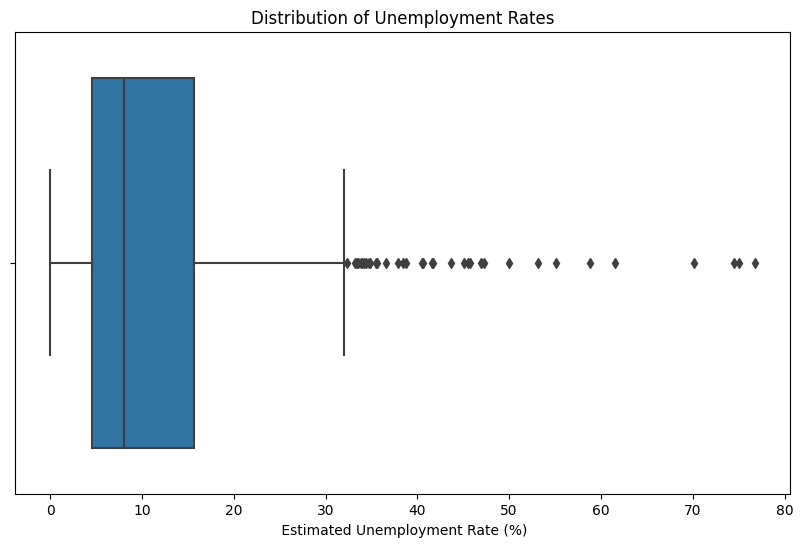

In [21]:
# Visualization 3: Distribution of Unemployment Rates
plt.figure(figsize=(10, 6))
sns.boxplot(x=' Estimated Unemployment Rate (%)', data=df)
plt.title('Distribution of Unemployment Rates')
plt.show()

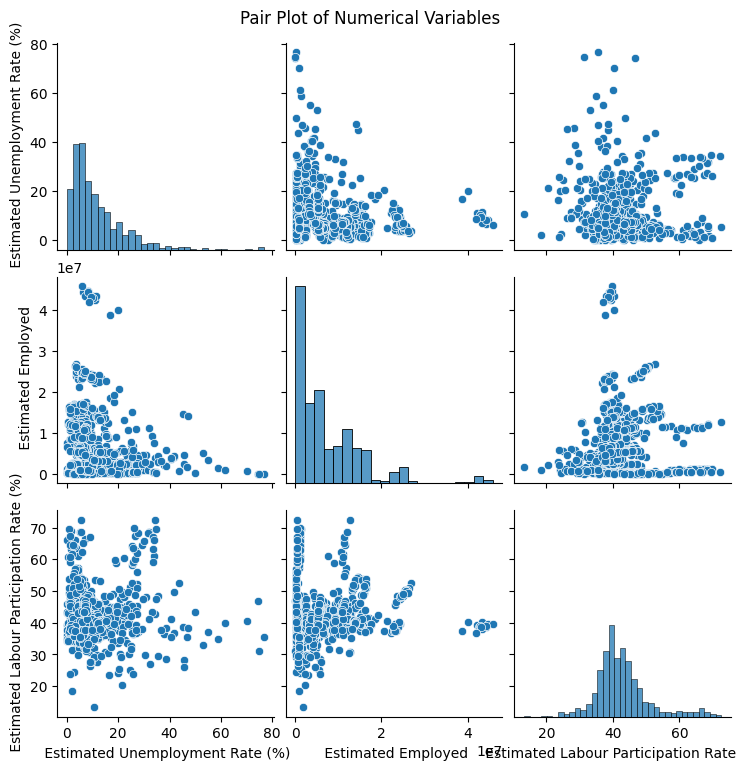

In [22]:
# Visualization 5: Pair Plot of Numerical Variables
sns.pairplot(df, vars=[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)'])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


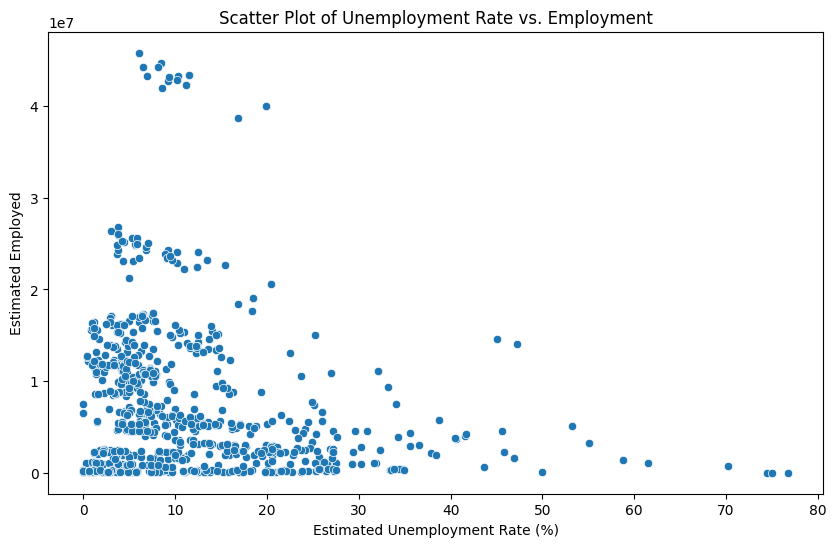

In [23]:
# Visualization 6: Scatter Plot - Unemployment Rate vs. Employment
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Estimated Unemployment Rate (%)', y=' Estimated Employed', data=df)
plt.title('Scatter Plot of Unemployment Rate vs. Employment')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Estimated Employed')
plt.show()


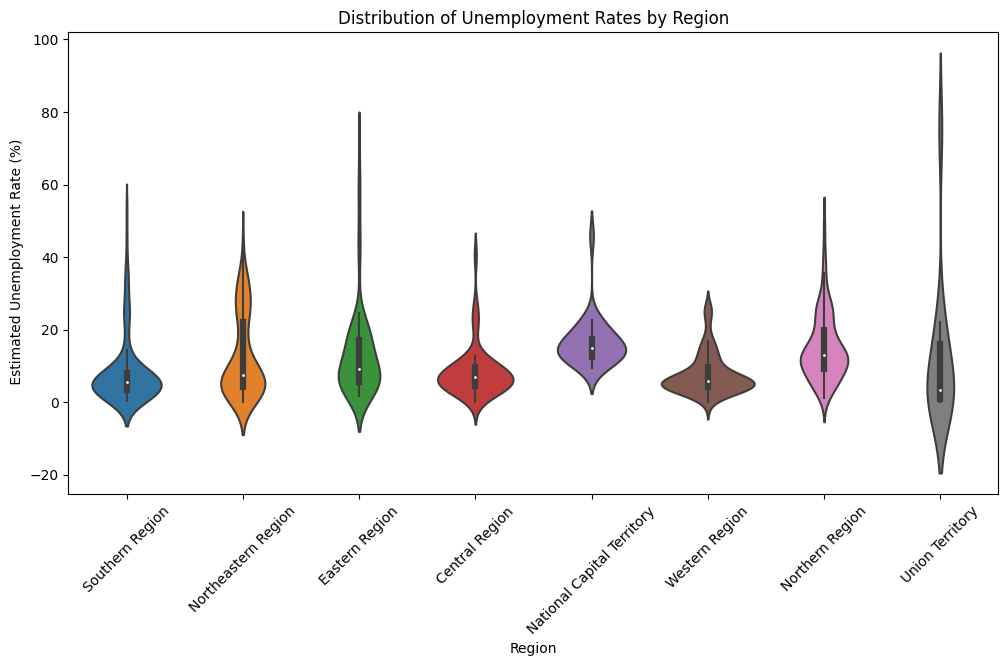

In [24]:
# Visualization 7: Violin Plot - Distribution of Unemployment Rates by Region
plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Unemployment Rates by Region')
plt.show()


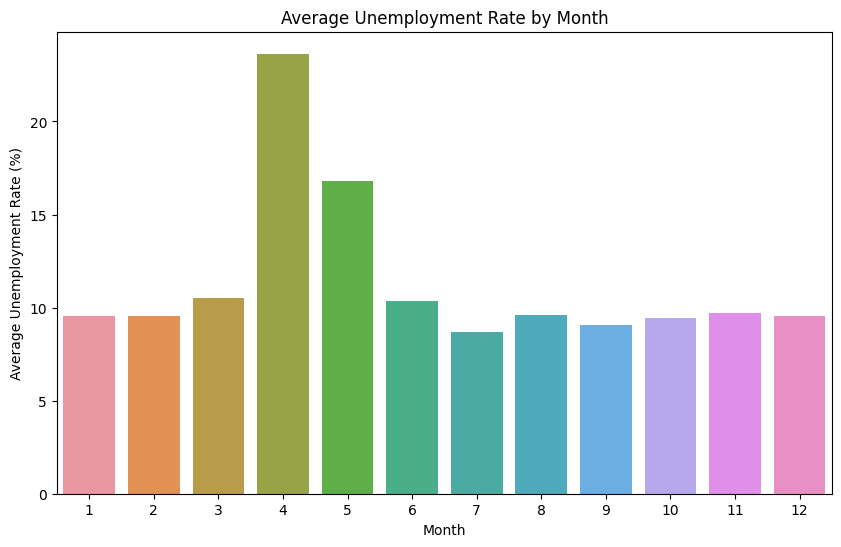

The month with the lowest unemployment rate is Month 7.0


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by month and calculate the average unemployment rate for each month
monthly_avg_unemployment = df.groupby('Month')[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Sort the data by average unemployment rate in ascending order
monthly_avg_unemployment = monthly_avg_unemployment.sort_values(by=' Estimated Unemployment Rate (%)')

# Get the month with the lowest unemployment rate
lowest_unemployment_month = monthly_avg_unemployment.iloc[0]['Month']

# Create a bar plot to visualize the average unemployment rate by month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y=' Estimated Unemployment Rate (%)', data=monthly_avg_unemployment)
plt.title('Average Unemployment Rate by Month')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=0)  # Optionally, set rotation to 0 if you don't want month labels to be rotated
plt.show()

print(f"The month with the lowest unemployment rate is Month {lowest_unemployment_month}")


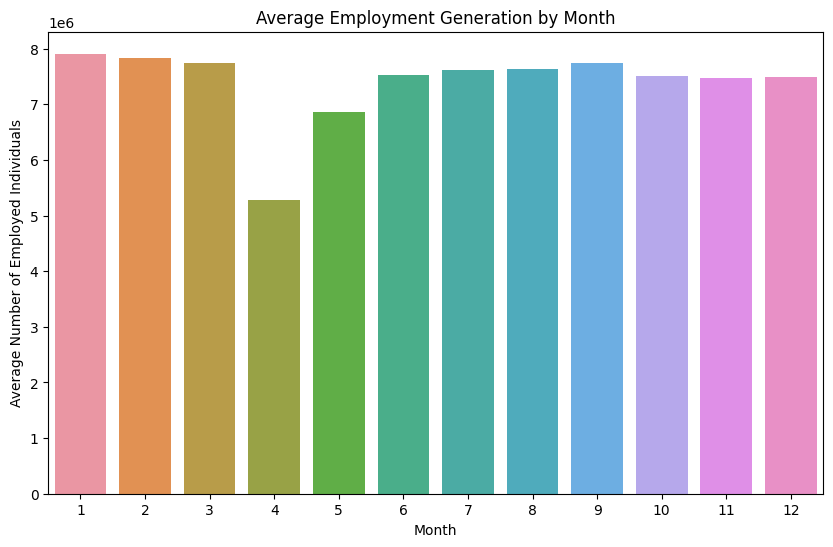

The month with the highest employment generation is Month 1.0


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by month and calculate the average number of employed individuals for each month
monthly_avg_employment = df.groupby('Month')[' Estimated Employed'].mean().reset_index()

# Sort the data by average number of employed individuals in descending order to find the highest
monthly_avg_employment = monthly_avg_employment.sort_values(by=' Estimated Employed', ascending=False)

# Get the month with the highest employment generation
highest_employment_month = monthly_avg_employment.iloc[0]['Month']

# Create a bar plot to visualize the average number of employed individuals by month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y=' Estimated Employed', data=monthly_avg_employment)
plt.title('Average Employment Generation by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Employed Individuals')
plt.xticks(rotation=0)  # Optionally, set rotation to 0 if you don't want month labels to be rotated
plt.show()

print(f"The month with the highest employment generation is Month {highest_employment_month}")


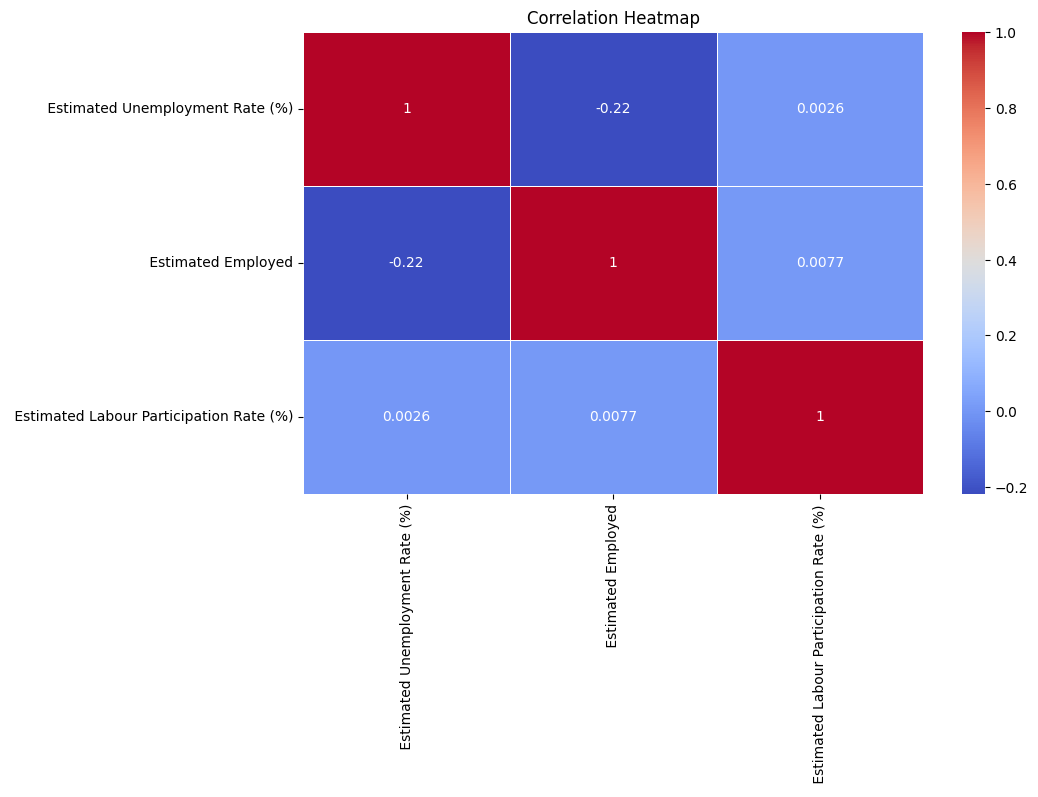

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns for correlation analysis
numerical_columns = [' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


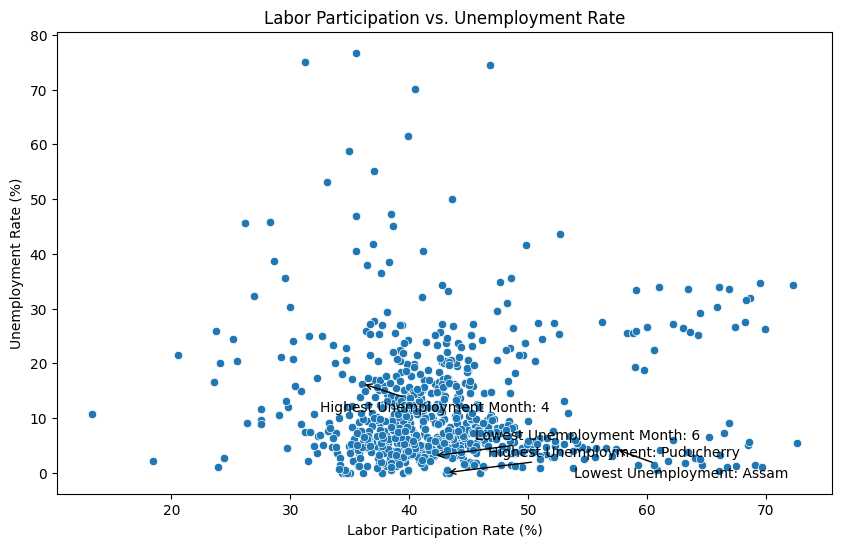

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a scatter plot to visualize the relationship between labor participation and unemployment rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Estimated Labour Participation Rate (%)', y=' Estimated Unemployment Rate (%)', data=df)
plt.title('Labor Participation vs. Unemployment Rate')
plt.xlabel('Labor Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')

# Add annotations for the highest and lowest unemployment states and months
plt.annotate(f'Highest Unemployment: {state_highest_unemployment}',
             xy=(df[df['State'] == state_highest_unemployment][' Estimated Labour Participation Rate (%)'].values[0],
                 df[df['State'] == state_highest_unemployment][' Estimated Unemployment Rate (%)'].values[0]),
             xytext=(30, 12), textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

plt.annotate(f'Lowest Unemployment: {state_lowest_unemployment}',
             xy=(df[df['State'] == state_lowest_unemployment][' Estimated Labour Participation Rate (%)'].values[0],
                 df[df['State'] == state_lowest_unemployment][' Estimated Unemployment Rate (%)'].values[0]),
             xytext=(-30, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

plt.annotate(f'Highest Unemployment Month: {month_highest_unemployment}',
             xy=(df[df['Month'] == month_highest_unemployment][' Estimated Labour Participation Rate (%)'].values[0],
                 df[df['Month'] == month_highest_unemployment][' Estimated Unemployment Rate (%)'].values[0]),
             xytext=(-30, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

plt.annotate(f'Lowest Unemployment Month: {month_lowest_unemployment}',
             xy=(df[df['Month'] == month_lowest_unemployment][' Estimated Labour Participation Rate (%)'].values[0],
                 df[df['Month'] == month_lowest_unemployment][' Estimated Unemployment Rate (%)'].values[0]),
             xytext=(30, 12), textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

# Show the plot
plt.show()



In [39]:
# State with highest Unemployment
state_highest_unemployment = df[df[' Estimated Unemployment Rate (%)'] == df[' Estimated Unemployment Rate (%)'].max()]['State'].values[0]

# State with lowest Unemployment
state_lowest_unemployment = df[df[' Estimated Unemployment Rate (%)'] == df[' Estimated Unemployment Rate (%)'].min()]['State'].values[0]

# Month with highest Unemployment
month_highest_unemployment = df[df[' Estimated Unemployment Rate (%)'] == df[' Estimated Unemployment Rate (%)'].max()]['Month'].values[0]

# Month with lowest Unemployment
month_lowest_unemployment = df[df[' Estimated Unemployment Rate (%)'] == df[' Estimated Unemployment Rate (%)'].min()]['Month'].values[0]

# Print the findings
print("State with Highest Unemployment:", state_highest_unemployment)
print("State with Lowest Unemployment:", state_lowest_unemployment)
print("Month with Highest Unemployment:", month_highest_unemployment)
print("Month with Lowest Unemployment:", month_lowest_unemployment)

State with Highest Unemployment: Puducherry
State with Lowest Unemployment: Assam
Month with Highest Unemployment: 4
Month with Lowest Unemployment: 6


## **Project Insight**

**Unemployment Rate Trends Over Time:**
The COVID-19 pandemic had a significant impact on unemployment, resulting in a sharp and sudden increase in unemployment rates.

**Regional Disparities:**
The Northern Region consistently exhibits a higher average unemployment rate compared to other regions, indicating ongoing regional disparities in employment opportunities.

**Regions with High Employment Generation:**
State Utter Pradesh , Maharashtra ,WEst Bengal ,Bihar ,Tamilnadu are the top 5 states with the highest employment generation, presenting opportunities for economic growth and investment.

**Regions with High Unemployment:**
State Tripura , Hariyana,Jharkhand,bihar,Himachal paradesh are the top 5 states with the highest unemployment rates, signaling a need for targeted interventions to address elevated unemployment levels.